In [453]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from scipy.sparse import csr_matrix
from sklearn.neighbors import NearestNeighbors
from sklearn.neighbors import KNeighborsRegressor 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics.pairwise import cosine_similarity
import seaborn as sn 
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.offline as pyo
from sklearn import preprocessing


In [454]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [455]:
tracks_df = pd.read_csv("tracks.csv")

In [456]:
tracks_df['artists']=tracks_df['artists'].str.replace("\['", "").str.replace("'\]", "")


C:\Users\y_tat\AppData\Local\Temp\ipykernel_2932\3186876978.py:1: FutureWarning:

The default value of regex will change from True to False in a future version.



In [457]:
tracks_df['release_year']=tracks_df['release_date'].str.split('-', n=1, expand=True).iloc[:,0].astype('int64')


In [458]:
tracks_df.columns

Index(['id', 'name', 'popularity', 'duration_ms', 'explicit', 'artists',
       'id_artists', 'release_date', 'danceability', 'energy', 'key',
       'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness',
       'liveness', 'valence', 'tempo', 'time_signature', 'release_year'],
      dtype='object')

In [459]:
tracks_df= tracks_df[['id', 'id_artists', 'name', 'artists', 'release_date', 'release_year',
       'popularity', 'danceability', 'energy', 'key', 'loudness', 'mode',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'time_signature', 'duration_ms', 'explicit']]

In [460]:
tracks_df.head()

,id,id_artists,name,artists,release_date,release_year,popularity,danceability,energy,key,...,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,duration_ms,explicit
0,35iwgR4jXetI318WEWsa1Q,['45tIt06XoI0Iio4LBEVpls'],Carve,Uli,1922-02-22,1922,6,0.64500,0.44500,0,...,1,0.45100,0.67400,0.74400,0.15100,0.12700,104.85100,3,126903,0
1,021ht4sdgPcrDgSk7JTbKY,['14jtPCOoNZwquk5wd9DxrY'],Capítulo 2.16 - Banquero Anarquista,Fernando Pessoa,1922-06-01,1922,0,0.69500,0.26300,0,...,1,0.95700,0.79700,0.00000,0.14800,0.65500,102.00900,1,98200,0
2,07A5yehtSnoedViJAZkNnc,['5LiOoJbxVSAMkBS2fUm3X2'],Vivo para Quererte - Remasterizado,Ignacio Corsini,1922-03-21,1922,0,0.43400,0.17700,1,...,1,0.05120,0.99400,0.02180,0.21200,0.45700,130.41800,5,181640,0
3,08FmqUhxtyLTn6pAh6bk45,['5LiOoJbxVSAMkBS2fUm3X2'],El Prisionero - Remasterizado,Ignacio Corsini,1922-03-21,1922,0,0.32100,0.09460,7,...,1,0.05040,0.99500,0.91800,0.10400,0.39700,169.98000,3,176907,0
4,08y9GfoqCWfOGsKdwojr5e,['3BiJGZsyX9sJchTqcSA7Su'],Lady of the Evening,Dick Haymes,1922,1922,0,0.40200,0.15800,3,...,0,0.03900,0.98900,0.13000,0.31100,0.19600,103.22000,4,163080,0


In [461]:
tracks_df.shape        

(586672, 21)

In [462]:
tracks_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 586672 entries, 0 to 586671
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id                586672 non-null  object 
 1   id_artists        586672 non-null  object 
 2   name              586601 non-null  object 
 3   artists           586672 non-null  object 
 4   release_date      586672 non-null  object 
 5   release_year      586672 non-null  int64  
 6   popularity        586672 non-null  int64  
 7   danceability      586672 non-null  float64
 8   energy            586672 non-null  float64
 9   key               586672 non-null  int64  
 10  loudness          586672 non-null  float64
 11  mode              586672 non-null  int64  
 12  speechiness       586672 non-null  float64
 13  acousticness      586672 non-null  float64
 14  instrumentalness  586672 non-null  float64
 15  liveness          586672 non-null  float64
 16  valence           58

In [463]:
tracks_df.describe()

,release_year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,duration_ms,explicit
count,586672.00000,586672.00000,586672.00000,586672.00000,586672.00000,586672.00000,586672.00000,586672.00000,586672.00000,586672.00000,586672.00000,586672.00000,586672.00000,586672.00000,586672.00000,586672.00000
mean,1988.56617,27.57005,0.56359,0.54204,5.22160,-10.20607,0.65880,0.10486,0.44986,0.11345,0.21394,0.55229,118.46486,3.87338,230051.16729,0.04409
std,22.83128,18.37064,0.16610,0.25192,3.51942,5.08933,0.47411,0.17989,0.34884,0.26687,0.18433,0.25767,29.76411,0.47316,126526.08742,0.20529
min,1900.00000,0.00000,0.00000,0.00000,0.00000,-60.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,3344.00000,0.00000
25%,1974.00000,13.00000,0.45300,0.34300,2.00000,-12.89100,0.00000,0.03400,0.09690,0.00000,0.09830,0.34600,95.60000,4.00000,175093.00000,0.00000
50%,1992.00000,27.00000,0.57700,0.54900,5.00000,-9.24300,1.00000,0.04430,0.42200,0.00002,0.13900,0.56400,117.38400,4.00000,214893.00000,0.00000
75%,2007.00000,41.00000,0.68600,0.74800,8.00000,-6.48200,1.00000,0.07630,0.78500,0.00955,0.27800,0.76900,136.32100,4.00000,263867.00000,0.00000
max,2021.00000,100.00000,0.99100,1.00000,11.00000,5.37600,1.00000,0.97100,0.99600,1.00000,1.00000,1.00000,246.38100,5.00000,5621218.00000,1.00000


In [464]:
tracks_df.isnull().sum()

id                   0
id_artists           0
name                71
artists              0
release_date         0
release_year         0
popularity           0
danceability         0
energy               0
key                  0
loudness             0
mode                 0
speechiness          0
acousticness         0
instrumentalness     0
liveness             0
valence              0
tempo                0
time_signature       0
duration_ms          0
explicit             0
dtype: int64

In [465]:
tracks_df.nunique()

id                  586672
id_artists          115062
name                446474
artists             114030
release_date         19700
release_year           101
popularity             101
danceability          1285
energy                2571
key                     12
loudness             29196
mode                     2
speechiness           1655
acousticness          5217
instrumentalness      5402
liveness              1782
valence               1805
tempo               122706
time_signature           5
duration_ms         123122
explicit                 2
dtype: int64

In [466]:
tracks_df.head()

,id,id_artists,name,artists,release_date,release_year,popularity,danceability,energy,key,...,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,duration_ms,explicit
0,35iwgR4jXetI318WEWsa1Q,['45tIt06XoI0Iio4LBEVpls'],Carve,Uli,1922-02-22,1922,6,0.64500,0.44500,0,...,1,0.45100,0.67400,0.74400,0.15100,0.12700,104.85100,3,126903,0
1,021ht4sdgPcrDgSk7JTbKY,['14jtPCOoNZwquk5wd9DxrY'],Capítulo 2.16 - Banquero Anarquista,Fernando Pessoa,1922-06-01,1922,0,0.69500,0.26300,0,...,1,0.95700,0.79700,0.00000,0.14800,0.65500,102.00900,1,98200,0
2,07A5yehtSnoedViJAZkNnc,['5LiOoJbxVSAMkBS2fUm3X2'],Vivo para Quererte - Remasterizado,Ignacio Corsini,1922-03-21,1922,0,0.43400,0.17700,1,...,1,0.05120,0.99400,0.02180,0.21200,0.45700,130.41800,5,181640,0
3,08FmqUhxtyLTn6pAh6bk45,['5LiOoJbxVSAMkBS2fUm3X2'],El Prisionero - Remasterizado,Ignacio Corsini,1922-03-21,1922,0,0.32100,0.09460,7,...,1,0.05040,0.99500,0.91800,0.10400,0.39700,169.98000,3,176907,0
4,08y9GfoqCWfOGsKdwojr5e,['3BiJGZsyX9sJchTqcSA7Su'],Lady of the Evening,Dick Haymes,1922,1922,0,0.40200,0.15800,3,...,0,0.03900,0.98900,0.13000,0.31100,0.19600,103.22000,4,163080,0


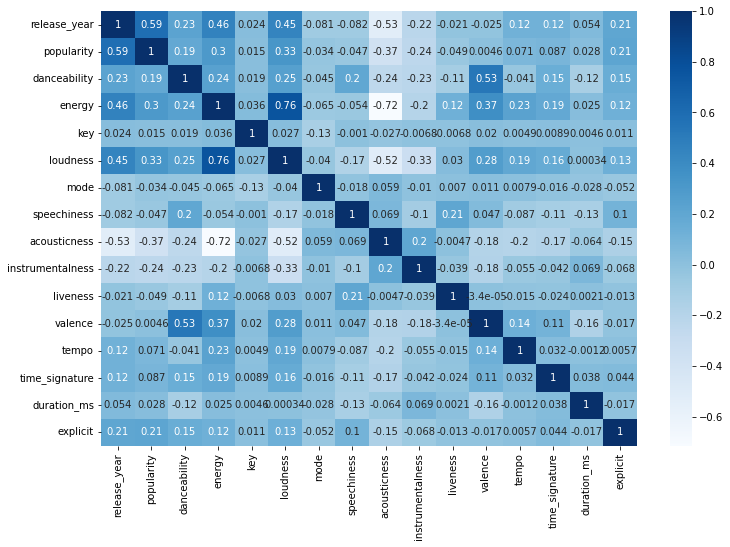

In [467]:
# corr = tracks_df.loc[:,"release_year":"tempo"].corr()
corr = tracks_df.loc[:,"release_year":"explicit"].corr()
plt.figure(figsize = (12,8))
sn.heatmap(corr, cmap="Blues", annot=True)
plt.show()

array([[<AxesSubplot:title={'center':'release_year'}>,
        <AxesSubplot:title={'center':'popularity'}>,
        <AxesSubplot:title={'center':'danceability'}>,
        <AxesSubplot:title={'center':'energy'}>],
       [<AxesSubplot:title={'center':'key'}>,
        <AxesSubplot:title={'center':'loudness'}>,
        <AxesSubplot:title={'center':'mode'}>,
        <AxesSubplot:title={'center':'speechiness'}>],
       [<AxesSubplot:title={'center':'acousticness'}>,
        <AxesSubplot:title={'center':'instrumentalness'}>,
        <AxesSubplot:title={'center':'liveness'}>,
        <AxesSubplot:title={'center':'valence'}>],
       [<AxesSubplot:title={'center':'tempo'}>,
        <AxesSubplot:title={'center':'time_signature'}>,
        <AxesSubplot:title={'center':'duration_ms'}>,
        <AxesSubplot:title={'center':'explicit'}>]], dtype=object)

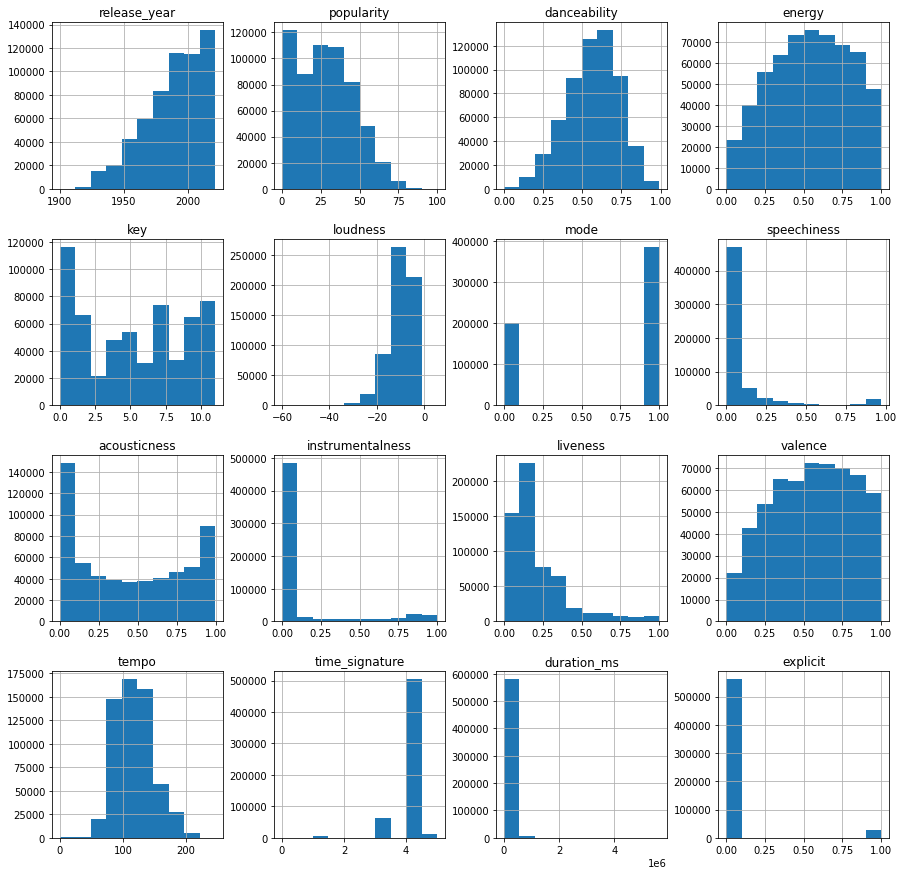

In [468]:
tracks_df.loc[:,"release_year":"explicit"].hist(figsize=(15,15))

In [469]:
min_max_scaler=preprocessing.MinMaxScaler()
col = tracks_df.loc[:,"release_year":].columns
normalized_data =min_max_scaler.fit_transform(tracks_df.loc[:,"release_year":])
normalized_tracks_df = pd.DataFrame(normalized_data, columns=col)

In [470]:
normalized_tracks_df.head()

,release_year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,duration_ms,explicit
0,0.18182,0.06000,0.65086,0.44500,0.00000,0.71375,1.00000,0.46447,0.67671,0.74400,0.15100,0.12700,0.42556,0.60000,0.02199,0.00000
1,0.18182,0.00000,0.70131,0.26300,0.00000,0.57917,1.00000,0.98558,0.80020,0.00000,0.14800,0.65500,0.41403,0.20000,0.01688,0.00000
2,0.18182,0.00000,0.43794,0.17700,0.09091,0.59380,1.00000,0.05273,0.99799,0.02180,0.21200,0.45700,0.52933,1.00000,0.03174,0.00000
3,0.18182,0.00000,0.32392,0.09460,0.63636,0.49007,1.00000,0.05191,0.99900,0.91800,0.10400,0.39700,0.68991,0.60000,0.03089,0.00000
4,0.18182,0.00000,0.40565,0.15800,0.27273,0.65926,0.00000,0.04016,0.99297,0.13000,0.31100,0.19600,0.41894,0.80000,0.02843,0.00000


In [471]:
for_graph = normalized_tracks_df.loc[:,"popularity":"explicit"].copy()
for_graph.loc[:,"release_year"] = tracks_df.loc[:,"release_year"]
cols = for_graph.columns.to_list()
cols = cols[-1:] + cols[:-1]
for_graph = for_graph.reindex(cols, axis=1)
for_graph.head(20)

,release_year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,duration_ms,explicit
0,1922,0.06000,0.65086,0.44500,0.00000,0.71375,1.00000,0.46447,0.67671,0.74400,0.15100,0.12700,0.42556,0.60000,0.02199,0.00000
1,1922,0.00000,0.70131,0.26300,0.00000,0.57917,1.00000,0.98558,0.80020,0.00000,0.14800,0.65500,0.41403,0.20000,0.01688,0.00000
2,1922,0.00000,0.43794,0.17700,0.09091,0.59380,1.00000,0.05273,0.99799,0.02180,0.21200,0.45700,0.52933,1.00000,0.03174,0.00000
3,1922,0.00000,0.32392,0.09460,0.63636,0.49007,1.00000,0.05191,0.99900,0.91800,0.10400,0.39700,0.68991,0.60000,0.03089,0.00000
4,1922,0.00000,0.40565,0.15800,0.27273,0.65926,0.00000,0.04016,0.99297,0.13000,0.31100,0.19600,0.41894,0.80000,0.02843,0.00000
5,1922,0.00000,0.22906,0.26100,0.45455,0.72897,1.00000,0.03934,0.99799,0.24700,0.09770,0.05390,0.48255,0.80000,0.03126,0.00000
6,1922,0.00000,0.51463,0.35500,0.36364,0.72147,1.00000,0.12770,0.96888,0.00000,0.15500,0.72700,0.34805,1.00000,0.02334,0.00000
7,1922,0.00000,0.56811,0.18400,0.36364,0.70734,1.00000,0.05273,0.99699,0.00002,0.32500,0.65400,0.54017,0.60000,0.02814,0.00000
8,1922,0.00000,0.49243,0.47500,0.00000,0.66963,0.00000,0.04109,0.62249,0.00645,0.10700,0.54400,0.56803,0.80000,0.05460,0.00000
9,1922,0.00000,0.55298,0.03910,0.54545,0.56247,1.00000,0.15757,1.00000,0.93300,0.14800,0.61200,0.30682,0.60000,0.03165,0.00000


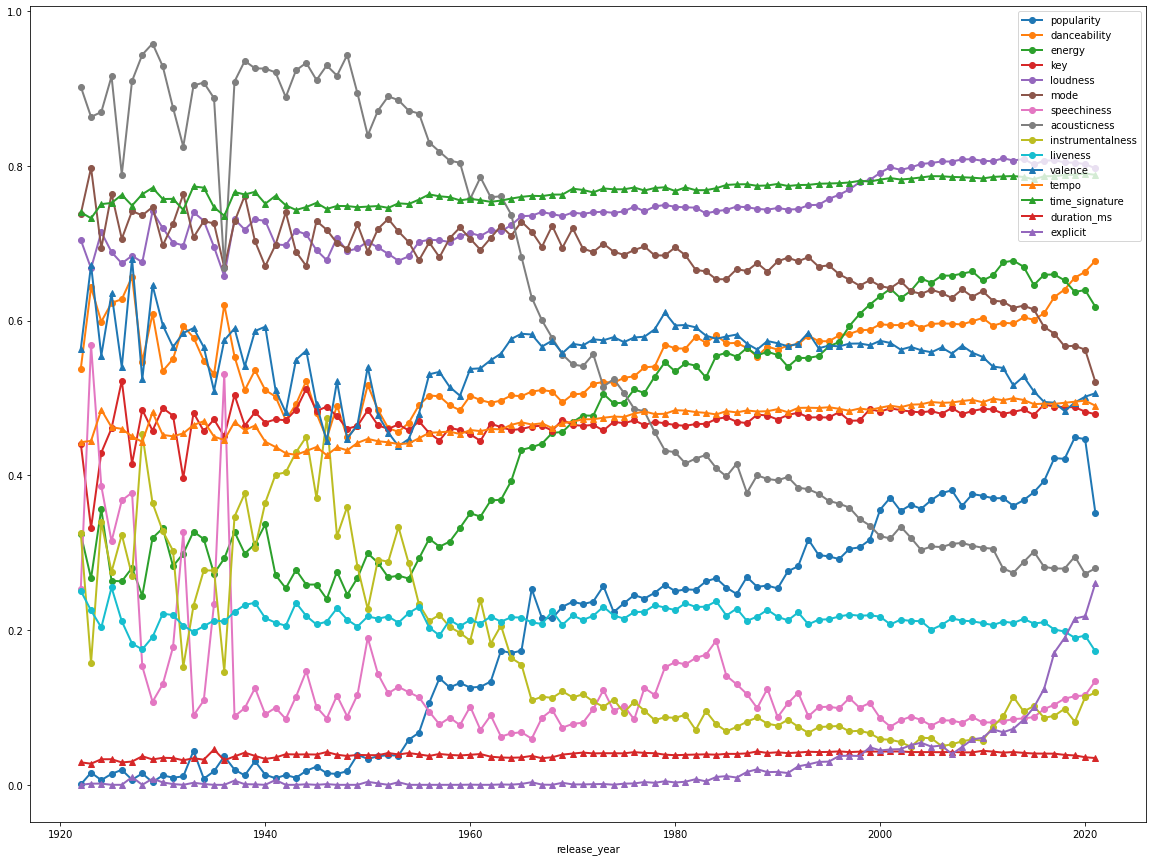

In [472]:
# plt.figure(figsize = (20,20))
styles = [ '-o',  '-o' , '-o', '-o', '-o', '-o', '-o', '-o', '-o', '-o', '-^','-^','-^','-^','-^']
for_graph[for_graph['release_year']>=1920].groupby('release_year').mean().plot(legend=True, figsize = (20,15),linewidth=2, style=styles)
plt.show()

In [473]:
normalized_tracks_df.popularity.unique()

array([0.06, 0.  , 0.01, 0.04, 0.41, 0.38, 0.3 , 0.28, 0.27, 0.26, 0.25,
       0.23, 0.22, 0.2 , 0.18, 0.17, 0.16, 0.15, 0.14, 0.11, 0.1 , 0.08,
       0.09, 0.05, 0.07, 0.02, 0.39, 0.33, 0.32, 0.24, 0.21, 0.19, 0.13,
       0.12, 0.03, 0.51, 0.48, 0.4 , 0.34, 0.29, 0.47, 0.43, 0.37, 0.35,
       0.31, 0.55, 0.5 , 0.36, 0.42, 0.65, 0.53, 0.45, 0.49, 0.46, 0.44,
       0.52, 0.56, 0.54, 0.61, 0.62, 0.57, 0.69, 0.58, 0.68, 0.6 , 0.64,
       0.63, 0.67, 0.66, 0.59, 0.74, 0.71, 0.77, 0.7 , 0.79, 0.75, 0.73,
       0.72, 0.8 , 0.78, 0.76, 0.82, 0.83, 0.84, 0.81, 0.86, 0.85, 0.87,
       0.9 , 0.88, 0.89, 0.94, 0.92, 0.97, 0.96, 0.95, 0.93, 0.91, 1.  ,
       0.99, 0.98])

In [474]:
popularity_threshold=0.5
normalized_tracks_df= normalized_tracks_df[normalized_tracks_df['popularity']>popularity_threshold]

In [475]:
normalized_tracks_df.shape

(69603, 16)

In [476]:
normalized_tracks_df_withIndex= normalized_tracks_df.copy()
normalized_tracks_df_withIndex.insert(0, "name",tracks_df['name'])
normalized_tracks_df_withIndex.insert(1, "artists",tracks_df['artists'])
normalized_tracks_df_withIndex = normalized_tracks_df_withIndex.drop_duplicates(subset=['name', 'artists'],keep='last')
normalized_tracks_df_withIndex.shape



(63220, 18)

In [477]:
normalized_tracks_df_withIndex= normalized_tracks_df_withIndex.set_index(['name', 'artists'])
normalized_tracks_df_withIndex.head()

,,release_year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,duration_ms,explicit
name,artists,,,,,,,,,,,,,,,,
Ain't Misbehavin',Fats Waller,0.21488,0.51000,0.51968,0.22200,0.00000,0.65899,0.00000,0.05922,0.82430,0.00193,0.19000,0.35000,0.39921,0.80000,0.04173,0.00000
Mack the Knife,Louis Armstrong,0.23967,0.55000,0.67911,0.37700,0.00000,0.70147,1.00000,0.07178,0.58835,0.00000,0.33200,0.71300,0.36112,0.80000,0.03527,0.00000
All of Me,Billie Holiday,0.27273,0.65000,0.50858,0.06440,0.18182,0.69209,0.00000,0.04202,0.97590,0.00000,0.17400,0.40300,0.43426,1.00000,0.03170,0.00000
Tea for Two,Art Tatum,0.27273,0.53000,0.36125,0.45200,0.09091,0.71861,1.00000,0.03574,0.99498,0.86400,0.14000,0.52500,0.67770,0.80000,0.03391,0.00000
Summertime,Billie Holiday,0.27273,0.53000,0.63370,0.22600,0.90909,0.70247,0.00000,0.03821,0.90663,0.00001,0.17100,0.60800,0.40341,0.80000,0.03029,0.00000


In [478]:
normalized_tracks_df_withIndex = normalized_tracks_df_withIndex.reset_index()

In [479]:
normalized_tracks_df_withIndex['artists']=normalized_tracks_df_withIndex['artists'].str.lower()
normalized_tracks_df_withIndex['name']=normalized_tracks_df_withIndex['name'].str.lower()
normalized_tracks_df_withIndex.head()


,name,artists,release_year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,duration_ms,explicit
0,ain't misbehavin',fats waller,0.21488,0.51000,0.51968,0.22200,0.00000,0.65899,0.00000,0.05922,0.82430,0.00193,0.19000,0.35000,0.39921,0.80000,0.04173,0.00000
1,mack the knife,louis armstrong,0.23967,0.55000,0.67911,0.37700,0.00000,0.70147,1.00000,0.07178,0.58835,0.00000,0.33200,0.71300,0.36112,0.80000,0.03527,0.00000
2,all of me,billie holiday,0.27273,0.65000,0.50858,0.06440,0.18182,0.69209,0.00000,0.04202,0.97590,0.00000,0.17400,0.40300,0.43426,1.00000,0.03170,0.00000
3,tea for two,art tatum,0.27273,0.53000,0.36125,0.45200,0.09091,0.71861,1.00000,0.03574,0.99498,0.86400,0.14000,0.52500,0.67770,0.80000,0.03391,0.00000
4,summertime,billie holiday,0.27273,0.53000,0.63370,0.22600,0.90909,0.70247,0.00000,0.03821,0.90663,0.00001,0.17100,0.60800,0.40341,0.80000,0.03029,0.00000


In [480]:

tr3=pd.pivot_table(normalized_tracks_df_withIndex.loc[:,:"explicit"], index=['name','artists'])
tr3_csr=csr_matrix(tr3.values)
tr3.reset_index(inplace=True)

In [481]:
 model = NearestNeighbors(metric="cosine", algorithm ="brute")
 model.fit(tr3_csr)


NearestNeighbors(algorithm='brute', metric='cosine')

In [483]:
title ="yesterday"
artist="THe beatles"


In [484]:
def recommendation(title:str, artist:str):
    """ This is a method that recommends similar songs 
                Args:
                    title: title of song
                    artist: name of the artist for the song
                Returns:
                    result: title and artist name of songs that is simlar 
                    suggestions: index for the title and artist name of songs that is simlar
    """
    title=title.lower()
    artist = artist.lower()
    selected=tr3.loc[tr3.artists.str.contains(artist) & tr3.name.str.contains(title),:]

    distance, suggestions = model.kneighbors(selected.iloc[0,2:].values.reshape(1,-1),n_neighbors=10)
    result = [(tr3.iloc[suggestions.flatten()[i],0], tr3.iloc[suggestions.flatten()[i],1]) for i in range(len(suggestions.flatten()))]
    # print(distance)
    print(distance.flatten())
    print(suggestions)
    print(result)
    return result, suggestions

In [485]:
result, suggestions =recommendation(title, artist)

[1.11022302e-16 5.01242315e-03 5.45619874e-03 5.64339937e-03
 7.76471332e-03 7.97144672e-03 8.32095843e-03 8.61364874e-03
 9.41261532e-03 9.59979574e-03]
[[59406 31506 57525 52516 34732 14539 57521  7693 43215  6237]]
[('yesterday - remastered 2009', 'the beatles'), ('love of my life - remastered 2011', 'queen'), ('what a wonderful world - single version', 'louis armstrong'), ('the sound of silence - acoustic version', 'simon & garfunkel'), ('moon river (from "breakfast at tiffany\'s")', 'andy williams'), ('dream a little dream of me - with introduction', 'the mamas & the papas'), ('what a wonderful world', 'louis armstrong'), ('bridge over troubled water', 'simon & garfunkel'), ('release me', 'engelbert humperdinck'), ('bewitched, bothered, and bewildered', 'ella fitzgerald')]


In [488]:

suggestions= suggestions.flatten()

In [491]:
def visualisation(data:pd.DataFrame, suggestions_loc:list):
    """ This is a method that recommends similar songs 
                Args:
                    title: title of song
                    artist: name of the artist for the song
                Returns:
                    result: title and artist name of songs that is simlar 
                    suggestions: index for the title and artist name of songs that is simlar
    """
    radar_chart_data =data.iloc[suggestions_loc,:].copy()
    radar_chart_data['ForClosing'] =radar_chart_data['acousticness']

    categories = list (radar_chart_data.columns)[2:]
    categories[-1] = categories[0]
    categories

    angles = np.linspace(0, 2*np.pi, len(categories)-1, endpoint=False)
    # data = np.concatenate((data, [data[0]]))
    angles = np.concatenate((angles,[angles[0]])) 

    fig = plt.figure(figsize=(8,8))
    ax  = fig.add_subplot(111, polar=True)
    for i in range(5):
        data = radar_chart_data.iloc[i,2:].values
        ax.plot(angles, data, 'o-', linewidth=2, label=radar_chart_data.iloc[i,0].title())
        ax.fill(angles, data, alpha=0.05)

    ax.legend(bbox_to_anchor=(1.4,1.2), title="Songs")
    ax.set_thetagrids(angles*180/np.pi, labels=categories, fontsize=12, ha='center')
    ax.set_title(f"Comparison of Songs with \n  {radar_chart_data.iloc[0,0].title()}", fontsize=18, loc='left')
    ax.grid(True)



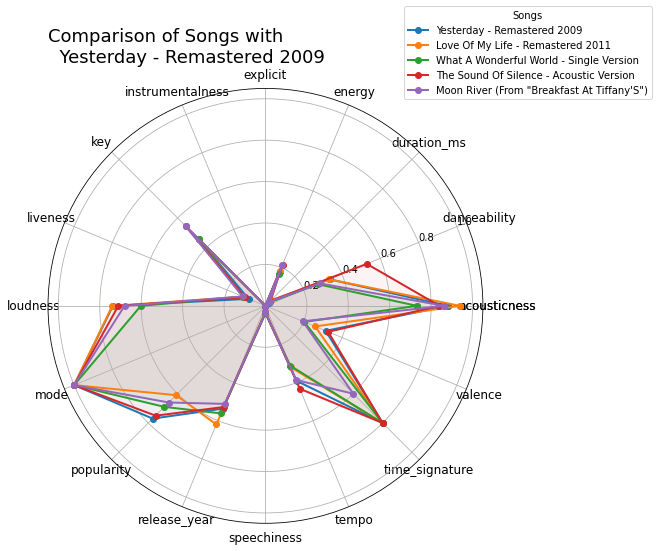

In [492]:
visualisation(tr3,suggestions)

Resource:

https://www.kaggle.com/datasets/lehaknarnauli/spotify-datasets?select=tracks.csv

https://www.kaggle.com/code/typewind/draw-a-radar-chart-with-python-in-a-simple-way/notebook

https://everydaycodings.medium.com/anime-recommendation-system-collaborative-method-ca3e84ee41a0

https://medium.com/swlh/spotify-song-prediction-and-recommendation-system-b3bbc71398ad
